In [114]:
'''I'm going to improve the model by deleting some data, but first I'll do
all the clean and pre-proccesing of data again'''
import pandas
raw_data = pandas.read_csv('U4_01_housing.csv')
raw_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [115]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [116]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [117]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [118]:
raw_data["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [119]:
raw_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

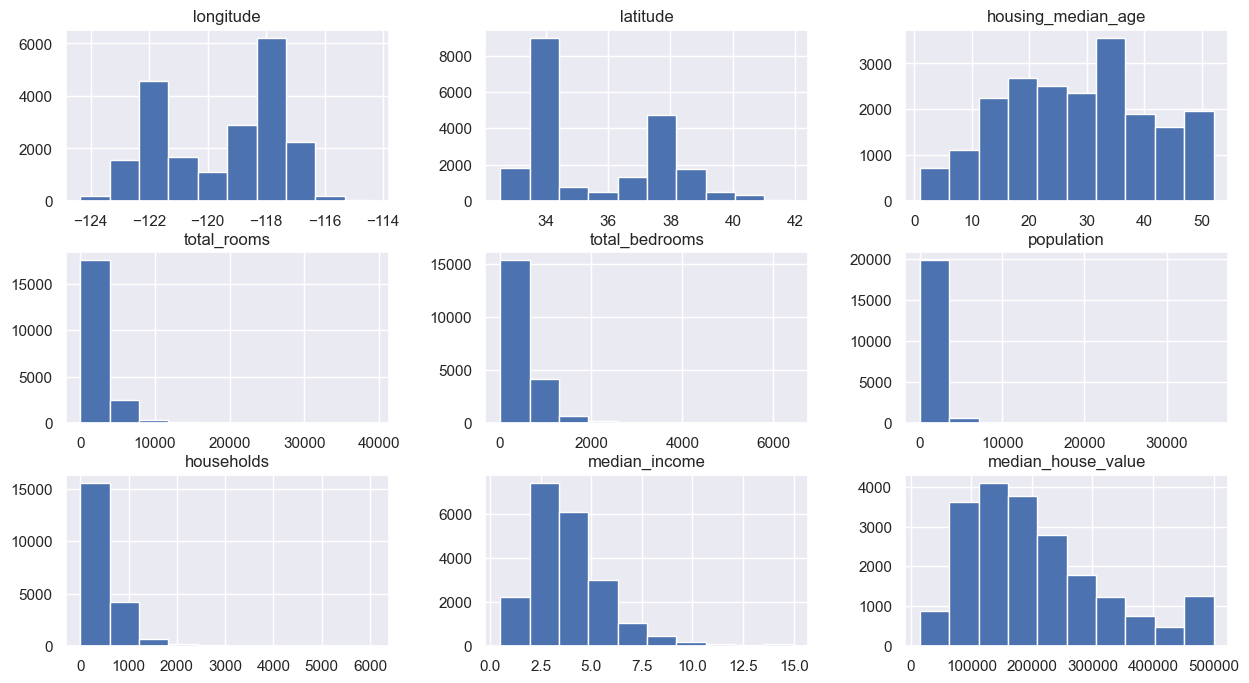

In [120]:
raw_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

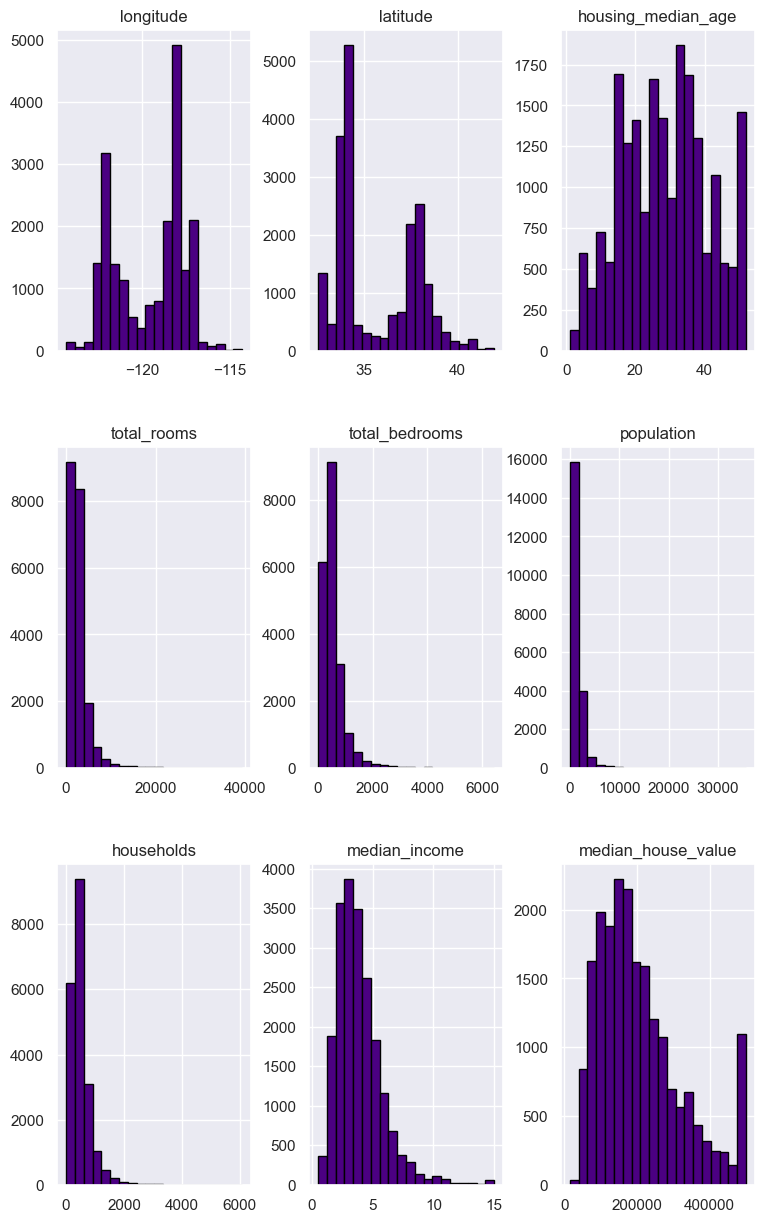

In [121]:
raw_data.hist(figsize=(9, 15), bins=20, edgecolor="black", color="indigo")

<Axes: xlabel='latitude', ylabel='longitude'>

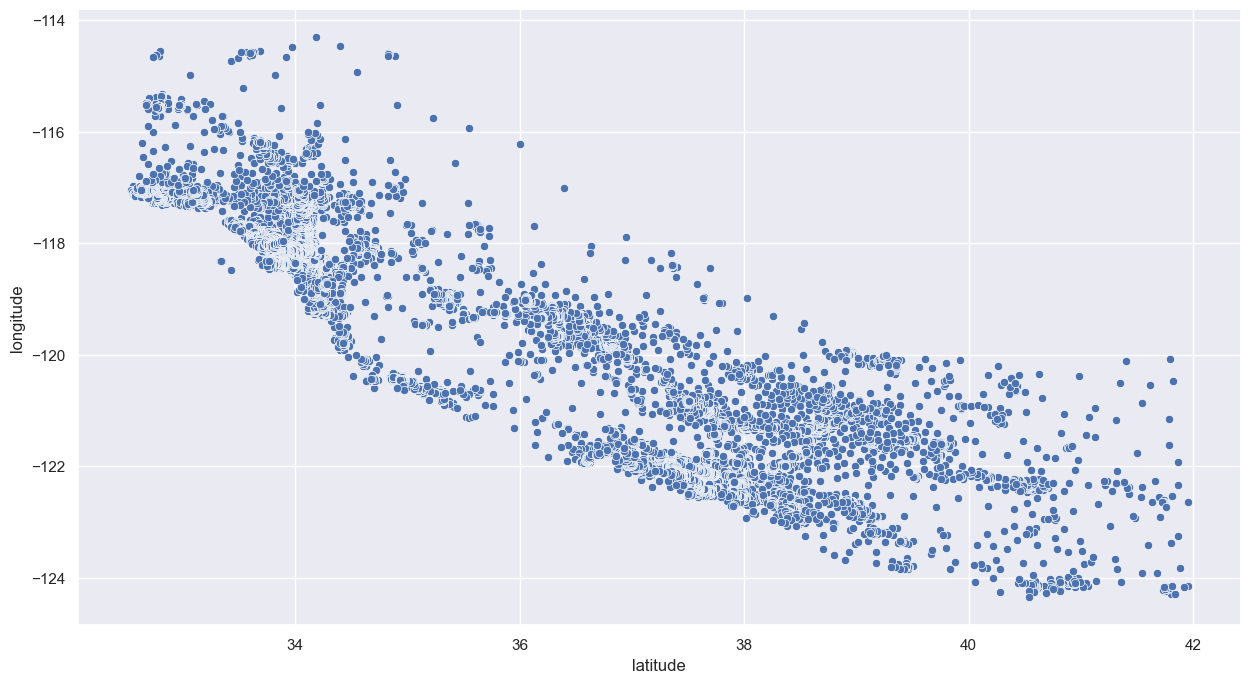

In [122]:
import seaborn
seaborn.scatterplot(x="latitude", y="longitude", data=raw_data)

<Axes: xlabel='latitude', ylabel='longitude'>

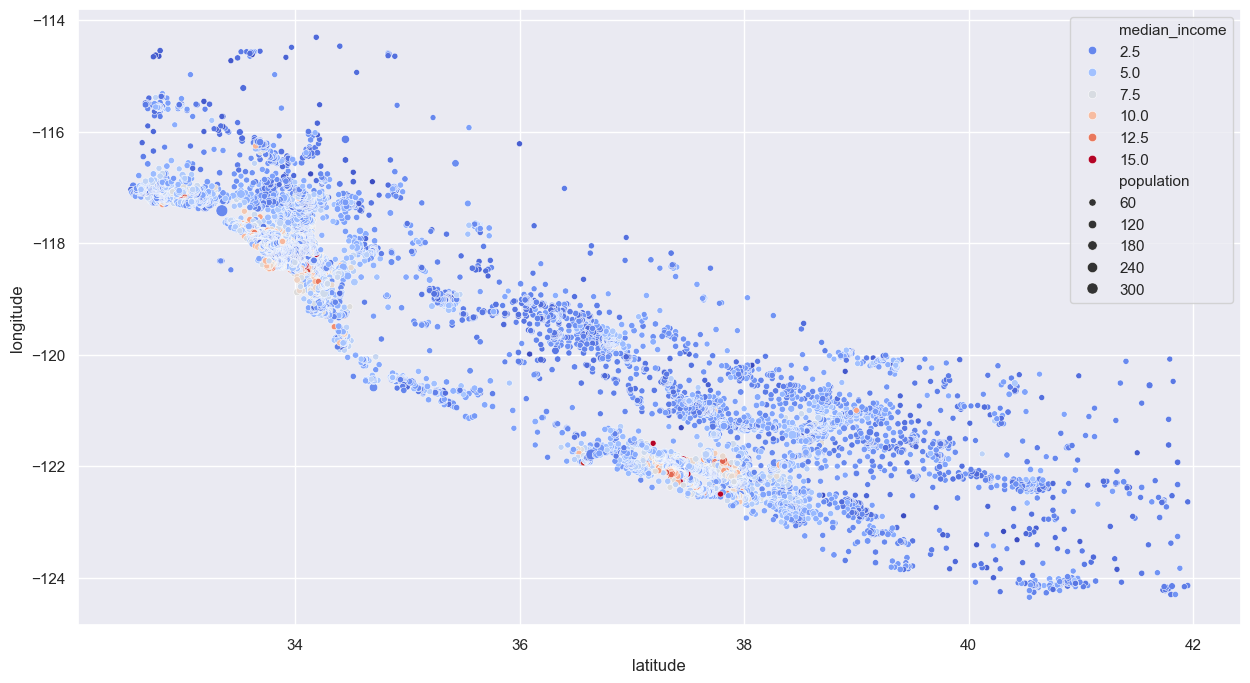

In [123]:
seaborn.scatterplot(x="latitude", y="longitude", data=raw_data, hue="median_income", palette="coolwarm", size=raw_data["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

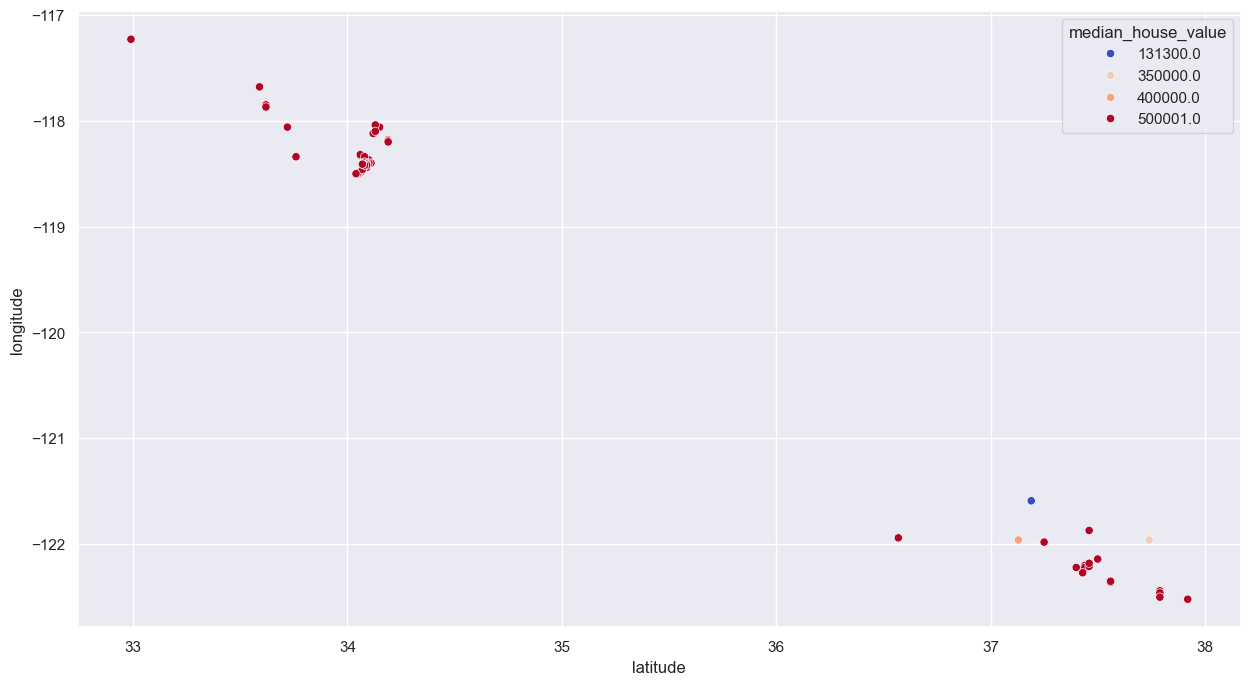

In [124]:
seaborn.scatterplot(x="latitude", y="longitude", data=raw_data[raw_data["median_income"] > 14], hue="median_house_value", palette='coolwarm')

In [125]:
no_empty_rows = raw_data.dropna()
no_empty_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [126]:
dummies = pandas.get_dummies(no_empty_rows["ocean_proximity"], dtype='int')
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [127]:
adding_dummies_data = no_empty_rows.join(dummies)
adding_dummies_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [128]:
drop_unnecesary_columns = adding_dummies_data.drop("ocean_proximity", axis=1)
drop_unnecesary_columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [129]:
drop_unnecesary_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  int64  
 10  INLAND              20433 non-null  int64  
 11  ISLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


In [130]:
drop_unnecesary_columns.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Delete the next data:
# * housing_median_age >= 50
# * median_house_value > 500_000
# * median_income max 15
filtered_data = drop_unnecesary_columns[(drop_unnecesary_columns["housing_median_age"] < 50) & (drop_unnecesary_columns["median_house_value"] < 500_000) & (drop_unnecesary_columns["median_income"] <= 15)]
filtered_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,0,0,0,1,0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [132]:
# Compare the values were deleted

filtered_data["housing_median_age"].value_counts()
drop_unnecesary_columns.housing_median_age.value_counts()

housing_median_age
52.0    1265
36.0     856
35.0     818
16.0     762
17.0     694
34.0     682
26.0     611
33.0     609
25.0     562
32.0     560
18.0     560
37.0     528
15.0     507
19.0     499
27.0     482
24.0     473
30.0     470
28.0     468
20.0     462
29.0     453
31.0     449
23.0     445
21.0     444
14.0     410
22.0     395
38.0     385
39.0     366
42.0     363
44.0     353
43.0     351
40.0     301
13.0     298
41.0     293
45.0     286
10.0     263
11.0     252
46.0     245
5.0      242
12.0     236
9.0      204
8.0      203
47.0     195
4.0      190
48.0     174
7.0      173
6.0      157
50.0     135
49.0     133
3.0       62
2.0       58
51.0      47
1.0        4
Name: count, dtype: int64

In [133]:
filtered_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.922540,-0.028554,0.034700,0.063988,0.089858,0.050350,-0.017614,-0.022945,0.287552,-0.089929,0.005713,-0.415739,0.042236
latitude,-0.922540,1.000000,-0.057572,-0.026590,-0.063897,-0.106171,-0.069717,-0.074514,-0.171720,-0.429795,0.383961,-0.010737,0.310374,-0.162727
housing_median_age,-0.028554,-0.057572,1.000000,-0.374497,-0.331323,-0.278671,-0.310592,-0.198700,0.014989,0.113976,-0.222102,0.001157,0.132736,0.037097
total_rooms,0.034700,-0.026590,-0.374497,1.000000,0.935412,0.860276,0.922459,0.223290,0.153280,-0.015975,0.027484,-0.006955,-0.002187,-0.013399
total_bedrooms,0.063988,-0.063897,-0.331323,0.935412,1.000000,0.880266,0.978774,0.021374,0.080035,0.012570,-0.012289,-0.004427,-0.006183,0.004024
population,0.089858,-0.106171,-0.278671,0.860276,0.880266,1.000000,0.910685,0.040766,0.022142,0.069823,-0.036657,-0.008007,-0.036784,-0.021515
households,0.050350,-0.069717,-0.310592,0.922459,0.978774,0.910685,1.000000,0.046059,0.099566,0.038259,-0.046025,-0.006919,0.003185,0.006123
median_income,-0.017614,-0.074514,-0.198700,0.223290,0.021374,0.040766,0.046059,1.000000,0.665109,0.184215,-0.226553,-0.008820,0.064227,-0.004842
median_house_value,-0.022945,-0.171720,0.014989,0.153280,0.080035,0.022142,0.099566,0.665109,1.000000,0.319547,-0.501849,0.019759,0.112488,0.145871
<1H OCEAN,0.287552,-0.429795,0.113976,-0.015975,0.012570,0.069823,0.038259,0.184215,0.319547,1.000000,-0.652800,-0.009460,-0.270446,-0.341158


<Axes: >

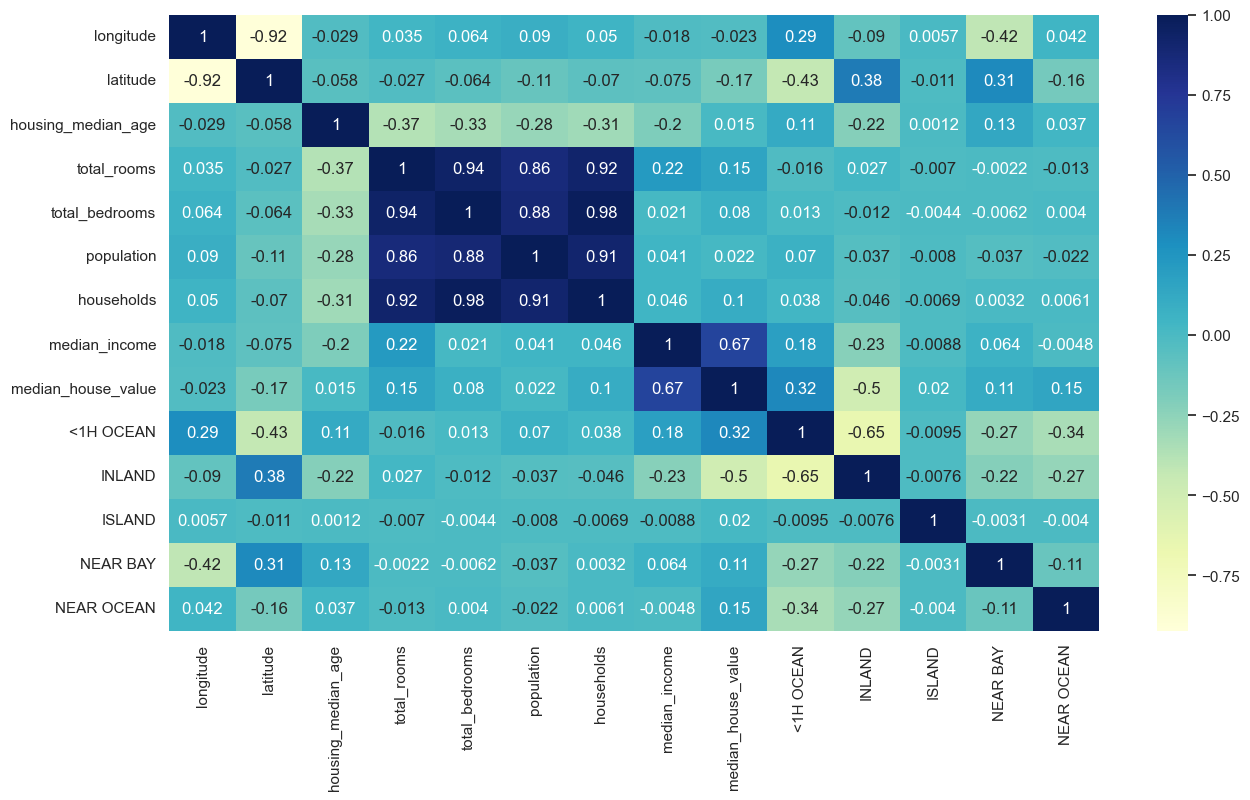

In [134]:
seaborn.set_theme(rc={'figure.figsize': (15, 8)})
seaborn.heatmap(filtered_data.corr(), annot=True, cmap='YlGnBu')

In [135]:
filtered_data.corr()["median_income"].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.665109
total_rooms           0.223290
<1H OCEAN             0.184215
NEAR BAY              0.064227
households            0.046059
population            0.040766
total_bedrooms        0.021374
NEAR OCEAN           -0.004842
ISLAND               -0.008820
longitude            -0.017614
latitude             -0.074514
housing_median_age   -0.198700
INLAND               -0.226553
Name: median_income, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

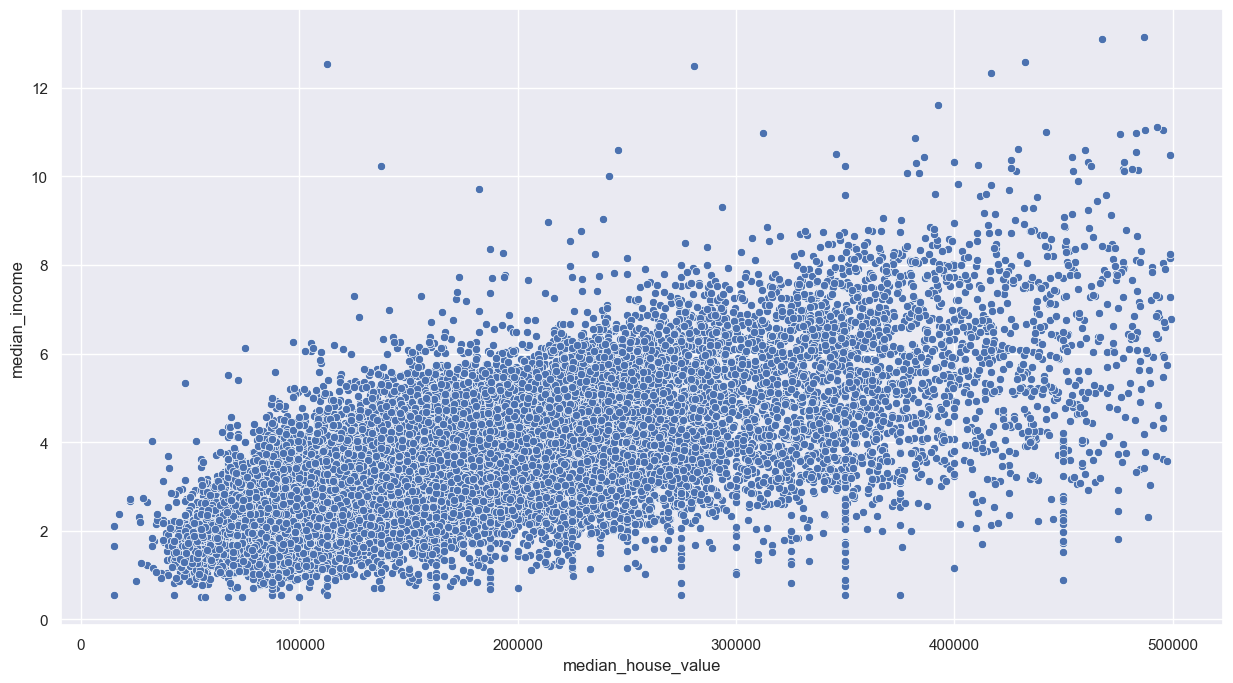

In [136]:
seaborn.scatterplot(x=filtered_data["median_house_value"], y=filtered_data["median_income"])

In [137]:
filtered_data["bedroom_ratio"] = filtered_data["total_bedrooms"] / filtered_data["total_rooms"]

C:\Users\aleja\AppData\Local\Temp\ipykernel_4580\1720492409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["bedroom_ratio"] = filtered_data["total_bedrooms"] / filtered_data["total_rooms"]


<Axes: >

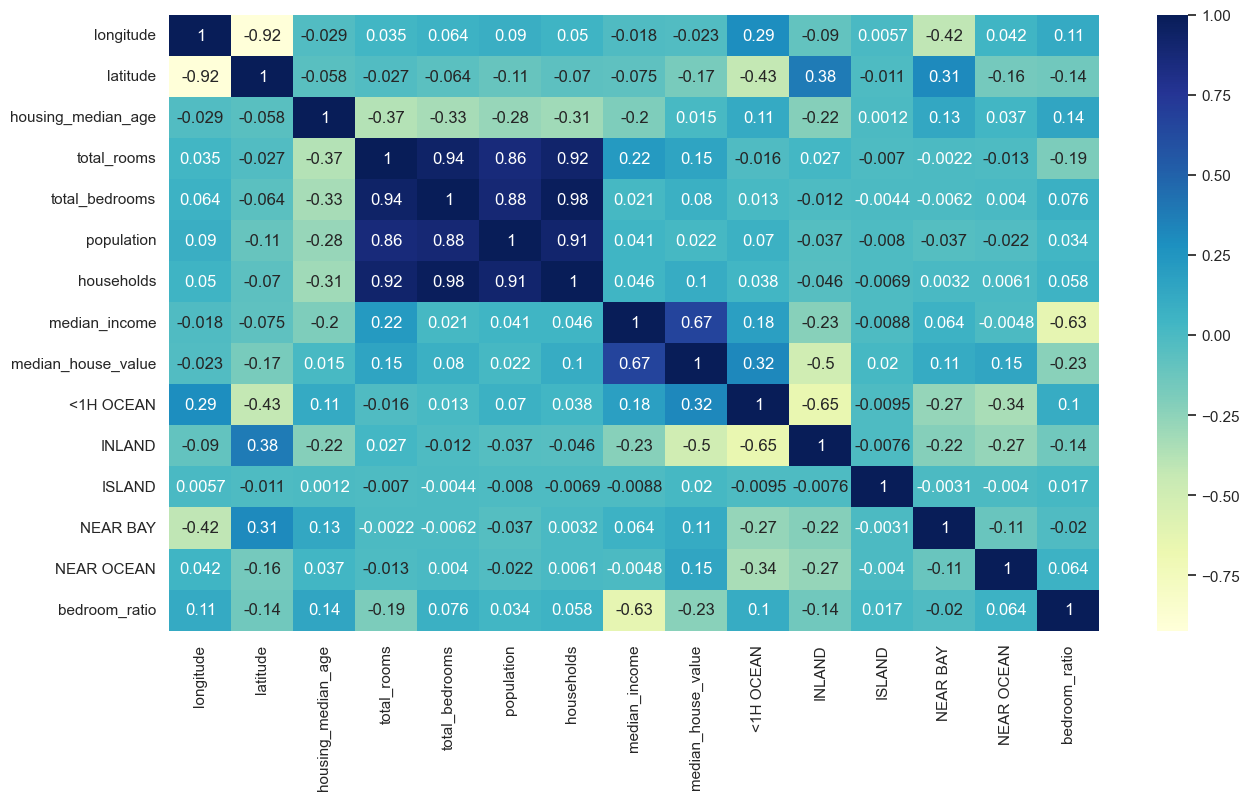

In [138]:
seaborn.set_theme(rc={'figure.figsize': (15,8)})
seaborn.heatmap(filtered_data.corr(), annot=True, cmap='YlGnBu')
# Note: there is a relation between "bedroom ratio" and "median_house_value":
# The house costs more if there are less bedrooms and more rooms (entertainment rooms...)

In [139]:
# Training model
x = filtered_data.drop(["median_house_value"], axis=1)
y = filtered_data["median_house_value"]

In [140]:
from sklearn.model_selection import train_test_split
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=.2)

In [141]:
# x has 14 columns, and y only one
print(x_training.shape)
print(y_training.shape)
print(x_testing.shape)
print(y_testing.shape)

(14556, 14)
(14556,)
(3639, 14)
(3639,)


In [142]:
# Creating an object of LinearRegression class
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

In [143]:
# Training our model previously created
my_model.fit(x_training, y_training)

LinearRegression()

In [144]:
# Save our model's predictions
predictions = my_model.predict(x_testing)
predictions

array([ 86722.28485168, 248105.37431621, 181430.23168744, ...,
       209462.06316567, 177594.34050235, 355651.65336722], shape=(3639,))

In [145]:
predictions_table = pandas.DataFrame(predictions)
predictions_table

,0
0,86722.284852
1,248105.374316
2,181430.231687
3,209832.990341
4,173959.011104
...,...
3634,294123.445922
3635,146224.791266
3636,209462.063166
3637,177594.340502


In [146]:
predictions

array([ 86722.28485168, 248105.37431621, 181430.23168744, ...,
       209462.06316567, 177594.34050235, 355651.65336722], shape=(3639,))

In [147]:
# compare training values against testing values
comparisons = {"Predictions Values": predictions, "Real Values": y_testing}
comparisons_table = pandas.DataFrame(comparisons)
comparisons_table


,Predictions Values,Real Values
2509,86722.284852,55000.0
18045,248105.374316,396300.0
13385,181430.231687,178700.0
7977,209832.990341,162600.0
6540,173959.011104,165100.0
...,...,...
14153,294123.445922,219200.0
13711,146224.791266,143100.0
15362,209462.063166,263300.0
14869,177594.340502,67500.0


In [148]:
# Checking Overfitting
print(my_model.score(x_training, y_training))
print(my_model.score(x_testing, y_testing))

0.63408713776496
0.6362555081717797


In [149]:
# Get average error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_testing, predictions)
mse

3350810051.50677

In [150]:
import numpy
rmse = numpy.sqrt(mse)
rmse
# The average difference between our predictions and real values improved
# since we clean the data more

np.float64(57886.18187017321)